# Practice: First, Hydro-dynamical PDE models

As modelers of stellar atmospheres, we are primarily interested in solving the equations of mass, momentum, and energy balance, along with the equations governing the evolution of the magnetic field, the transport equations for the radiation field, heat flux equations, etc. For this project, we will start with the hydrodynamic equations in 1 dimension as follows: 

$$ \frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \bf u) = 0 $$

$$ \frac{\partial \rho {\bf u}}{\partial t} + \nabla \cdot (\rho {\bf u} \otimes {\bf u}) = - \nabla (P_g)$$

$$ \frac{\partial e}{\partial t } = -\nabla\cdot e {\bf u} -P_g \nabla \cdot {\bf u}$$

where $\rho$, $\bf u$, $P_g$, and $e$ are the density, velocity vector, gas pressure, and internal energy. $\cdot$ and $\otimes$ are the dyadic and tensorial product, respectively. One extra equation needs to connect the pressure with the energy. For this you can use $P_g  = (\gamma-1)e/\rho$ where $\gamma=5/3$. Note that, in 1 dimension the operation  $\nabla \cdot (\rho {\bf u} \otimes {\bf u})$ becomes as follows: 

$$ \nabla \cdot (\rho {\bf u} \otimes {\bf u}) = \frac{\partial (\rho u^2)}{\partial x} $$

## 1- Build or select your code 

In this exercise, you can select one of the following options: 

1. Build your hydro-dynamical (HD) numerical code applying the tools/functions learned during the 6th different assessment. Solve the above set of equations in one dimension. 

    __A plus__ implement the [Bifrost 6th order spatial derivative, 5th order spatial interpolation](https://github.com/AST-Course/AST5110/wiki/Discretization) with the hyper-diffusion scheme (see [wiki](https://github.com/AST-Course/AST5110/wiki/Hyper-diffusive)). Note that Bifrost is using a [staggered mesh](https://github.com/AST-Course/AST5110/wiki/Staggered-mesh) where the density, pressure, energy, and temperature are cell-centered, and velocity and momentum are at the edges (in 1 dimension). 

    __A plus__ implement the [Flux limiter method](https://github.com/AST-Course/AST5110/wiki/Flux-limiter-method).

    __A plus__ implement the [Rieman Solver method](https://github.com/AST-Course/AST5110/wiki/Rieman-Solver-method).

    What would you choose for the CFL condition? 

2. Use the Bifrost, Ebysus, or other numerical codes you are interested in learning. 

    Note that I can help only with the numerical codes that I'm familiar with, but you should still select the ones you are interested in as long as you have access to them. 

## 2- Test the code

Set your code to run a 1D problem using the following initial conditions. The fluid is initially at rest on either side of a density and pressure jump. To the left, respectively right side of the interface, we have: 

$\rho_L = 0.125$

$\rho_R = 1.0$

$Pg_L = 0.125/\gamma$

$Pg_R = 1.0/\gamma$

The ratio of specific heats is chosen to be $\gamma = 5/3$ on both sides of the interface. The units are normalized, with the density and pressure in units of the density and pressure on the left-hand side of the jump and the velocity in units of the sound speed. The length unit is the size of the domain and the time in units of the time required to cross the domain at the speed of sound.

What boundary conditions would you choose?
What do you see? 

This is known as the Sod-shock tube test [Sod et al. 1978](https://ui.adsabs.harvard.edu/abs/1978JCoPh..27....1S/abstract), a standard test in computational HD codes. It consists of a one-dimensional flow discontinuity problem that provides a good test of a compressible code’s ability to capture shocks and contact discontinuities within a few grid zones and produce the correct density profile in a rarefaction or expansion wave. The test can also be used to check if the code can satisfy the Rankine-Hugoniot shock jump conditions since this test has an analytical solution. If you have access, you can also look at _Computational Gasdynamics book from Culbert B. Laney_ Section 5. However, many other books will describe this problem in detail. 
 
Compare the simulation with the analytical solution. This could be used for a sanity test after new additions to the code. 

__Suggestion__ This test might be too complex to debug the code. However, as a starting debugging test, you can consider an advection test (constant initial velocity) of a gaussian density perturbation in pressure balance. 

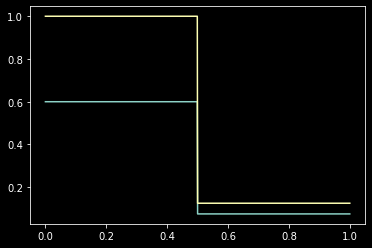

In [1]:
import numpy as np
import nm_lib as nm
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')



nump = 1000
xx = np.linspace(0,1,nump+1)
u = np.zeros(nump+1)

cfl_cut = 0.1
Nt = 2000
dx = xx[1]-xx[0]

rho_R = 0.125
rho_L = 1.0

rho = np.ones(nump+1)*rho_L
rho[int(nump/2):] = rho_R

gamma = 5/3
Pg_R = 0.125/gamma
Pg_L = 1.0/gamma

#e = np.zeros(nump+1)


Pg = np.ones(nump+1)*Pg_L
Pg[int(nump/2):] = Pg_R

plt.plot(xx,Pg)
plt.plot(xx,rho)

et,ut,rhot,Pt,t = nm.evolve_hydro(xx,u,rho,Nt,Pg,gamma,cfl_cut = cfl_cut, ddx = nm.deriv_cent, bnd_limits = [4,4],bnd_type="edge")

nm.animMHDparams(et,ut,rhot,Pt,t,xx,n_frames=35)
